## Лабораторная работа 4

In [200]:
import os
import matplotlib.pyplot as plt

In [201]:
import numpy as np
from imageio import imread

In [202]:
import cv2

In [203]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(os.path.join(folder,filename))
        img = imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [204]:
folder_path = "./data/"
images = load_images_from_folder(folder_path)

./data/boat2.png


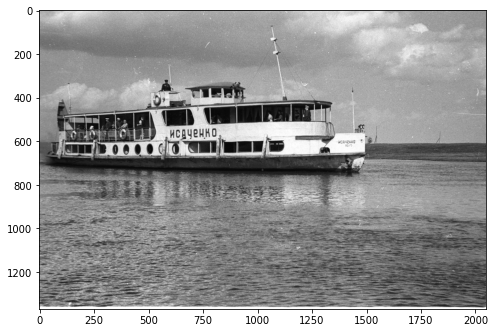

In [213]:
img = images[0]
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')

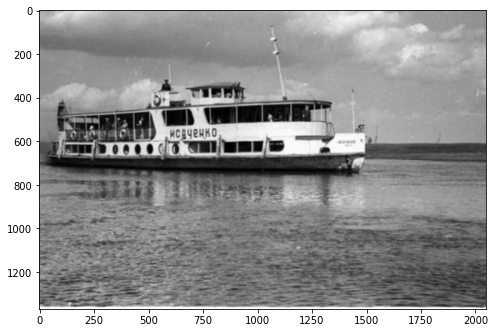

In [214]:
img = cv2.GaussianBlur(img, (9, 9), 3)
plt.figure(figsize=(8, 6))
plt.imshow(img, cmap='gray')

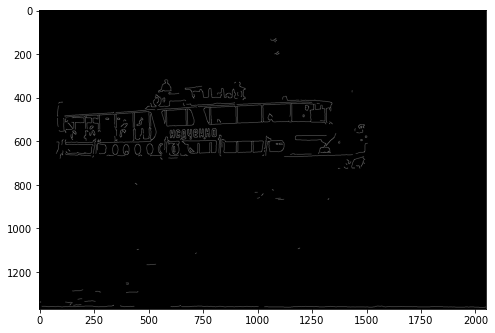

In [218]:
edges = cv2.Canny(img, 100, 150)
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap = 'gray')

In [223]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 75, None, 0, 0)
print(lines.shape)

(381, 1, 2)


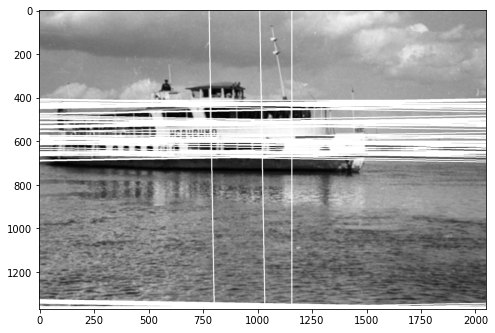

In [237]:
img_to_draw = np.copy(img)
for line in lines: 
    r, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = r*np.cos(theta)
    y0 = r*np.sin(theta)
    
    x1 = int(x0 + 2100*(-b))
    y1 = int(y0 + 2100*(a))
    x2 = int(x0 - 2100*(-b))
    y2 = int(y0 - 2100*(a))
    
    # choosing horizontal and vertical lines
    if (np.abs(x1 - x2) < 90) or (np.abs(y1 - y2) < 90):
        cv2.line(img_to_draw, (x1, y1), (x2, y2), (255, 255, 255), 3) 

plt.figure(figsize=(8, 6))
plt.imshow(img_to_draw, cmap='gray')

In [238]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, None, 0, 0)
print(lines.shape)

(1542, 1, 4)


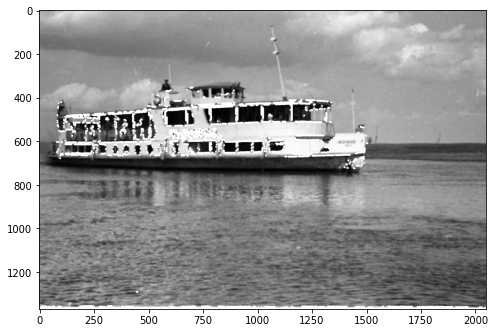

In [239]:
img_to_draw = np.copy(img)
for line in lines: 
    x1, y1, x2, y2 = line[0]
    cv2.line(img_to_draw, (x1, y1), (x2, y2), (255, 255, 255), 7) 

plt.figure(figsize=(8, 6))
plt.imshow(img_to_draw, cmap='gray')